# Linear regression

In [2]:
%pip install pipenv
%pip install scikit-learn
%pip install seaborn
%pip install matplotlib
%pip install numpy
%pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable


Note: you may need to restart the kernel to use updated packages.


In [21]:
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

## Loading data

In [29]:
dataset = pd.read_csv('train.csv')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [30]:
dataset.head(n=10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [31]:
dataset.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Variables selection and datasets split

In [32]:
inputs = dataset.iloc[:,1:-1] # skip Id and SalePrice
targets = dataset.iloc[:,-1:] # only SalePrice


## Target analysis

In [33]:
def plot_pdfs(df, h_cols = 4, fig_size_x=15):
    h_rows = math.ceil(len(df.columns) / h_cols)
    fig, axes = plt.subplots(h_rows, h_cols, figsize=(fig_size_x, 3*h_rows))
    axes = axes.flatten() if type(axes) is np.ndarray else [axes]
    for i, col in enumerate(df.columns):
        ax = axes[i]
        df[col].hist(ax=ax, bins=25)
        ax.set_title(col)
    plt.tight_layout()
    plt.show()

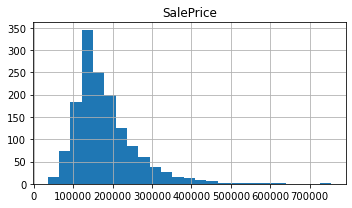

In [34]:
plot_pdfs(targets, h_cols=1, fig_size_x=5)

## Inputs analysis

In [35]:
X_numerical = inputs.select_dtypes(include=np.number)
X_categorical = inputs.select_dtypes(exclude=np.number)

# move from numerical to categorical
for label in ['MSSubClass']:
    X_categorical[label] = inputs[label]
    X_numerical.drop(label, axis=1, inplace=True)

In [36]:
print('Numerical features', X_numerical.columns)
print('Categorical features', X_categorical.columns)
print('All features shape', inputs.shape)

Numerical features Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')
Categorical features Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heat

#### Missing values analysis

In [37]:
df_nulls = pd.DataFrame(columns=['feature','nulls', 'prc'])
all_cnt = len(inputs)
ignore_na_features = []
for index, col in enumerate(inputs):
    null_cnt = inputs[col].isnull().sum()
    null_prc = null_cnt/all_cnt
    if null_cnt > 0:
        df_nulls.loc[len(df_nulls)] = {'feature': col, 'nulls': null_cnt, 'prc': 100*null_prc}
    if null_prc > 0.1:
        ignore_na_features.append(str(col))
df_nulls

,feature,nulls,prc
0,LotFrontage,259,17.739726
1,Alley,1369,93.767123
2,MasVnrType,872,59.726027
3,MasVnrArea,8,0.547945
4,BsmtQual,37,2.534247
5,BsmtCond,37,2.534247
6,BsmtExposure,38,2.602740
7,BsmtFinType1,37,2.534247
8,BsmtFinType2,38,2.602740
9,Electrical,1,0.068493


In [38]:
print('Feature to skip due to missing values', ignore_na_features)

Feature to skip due to missing values ['LotFrontage', 'Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']


#### PDFs for numerical features

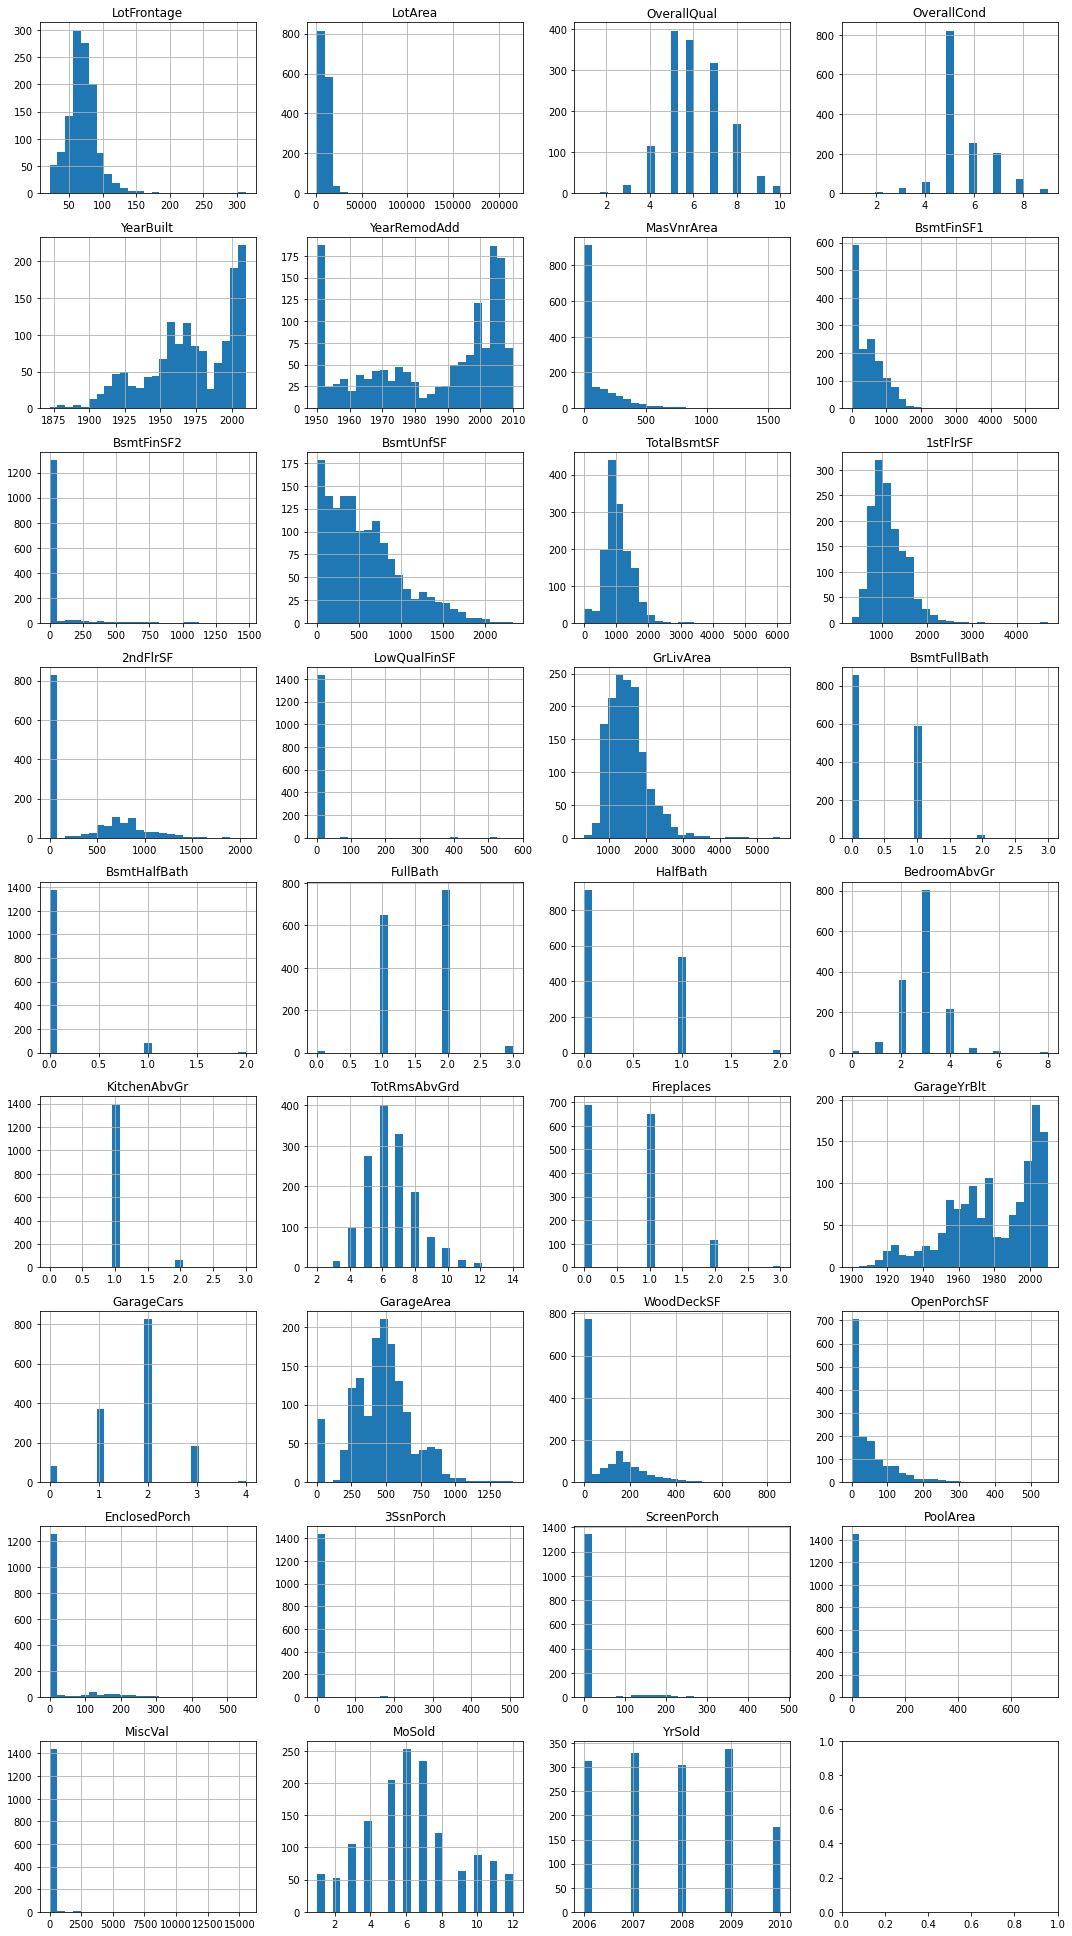

In [39]:
plot_pdfs(X_numerical)

#### XY scatter plots for numerical features

In [40]:
def plot_feature_target_xy(df_inputs, df_target, h_cols=4):
    h_rows = math.ceil(len(df_inputs.columns) / h_cols)
    fix2, axes2 = plt.subplots(h_rows, h_cols, figsize=(15,4 * h_rows), sharey=True)
    axes2 = axes2.flatten()
    for i, col in enumerate(df_inputs.columns):
        ax = axes2[i]
        ax.scatter(df_inputs[col], df_target['SalePrice'])
        ax.set_title(col)
    plt.show()

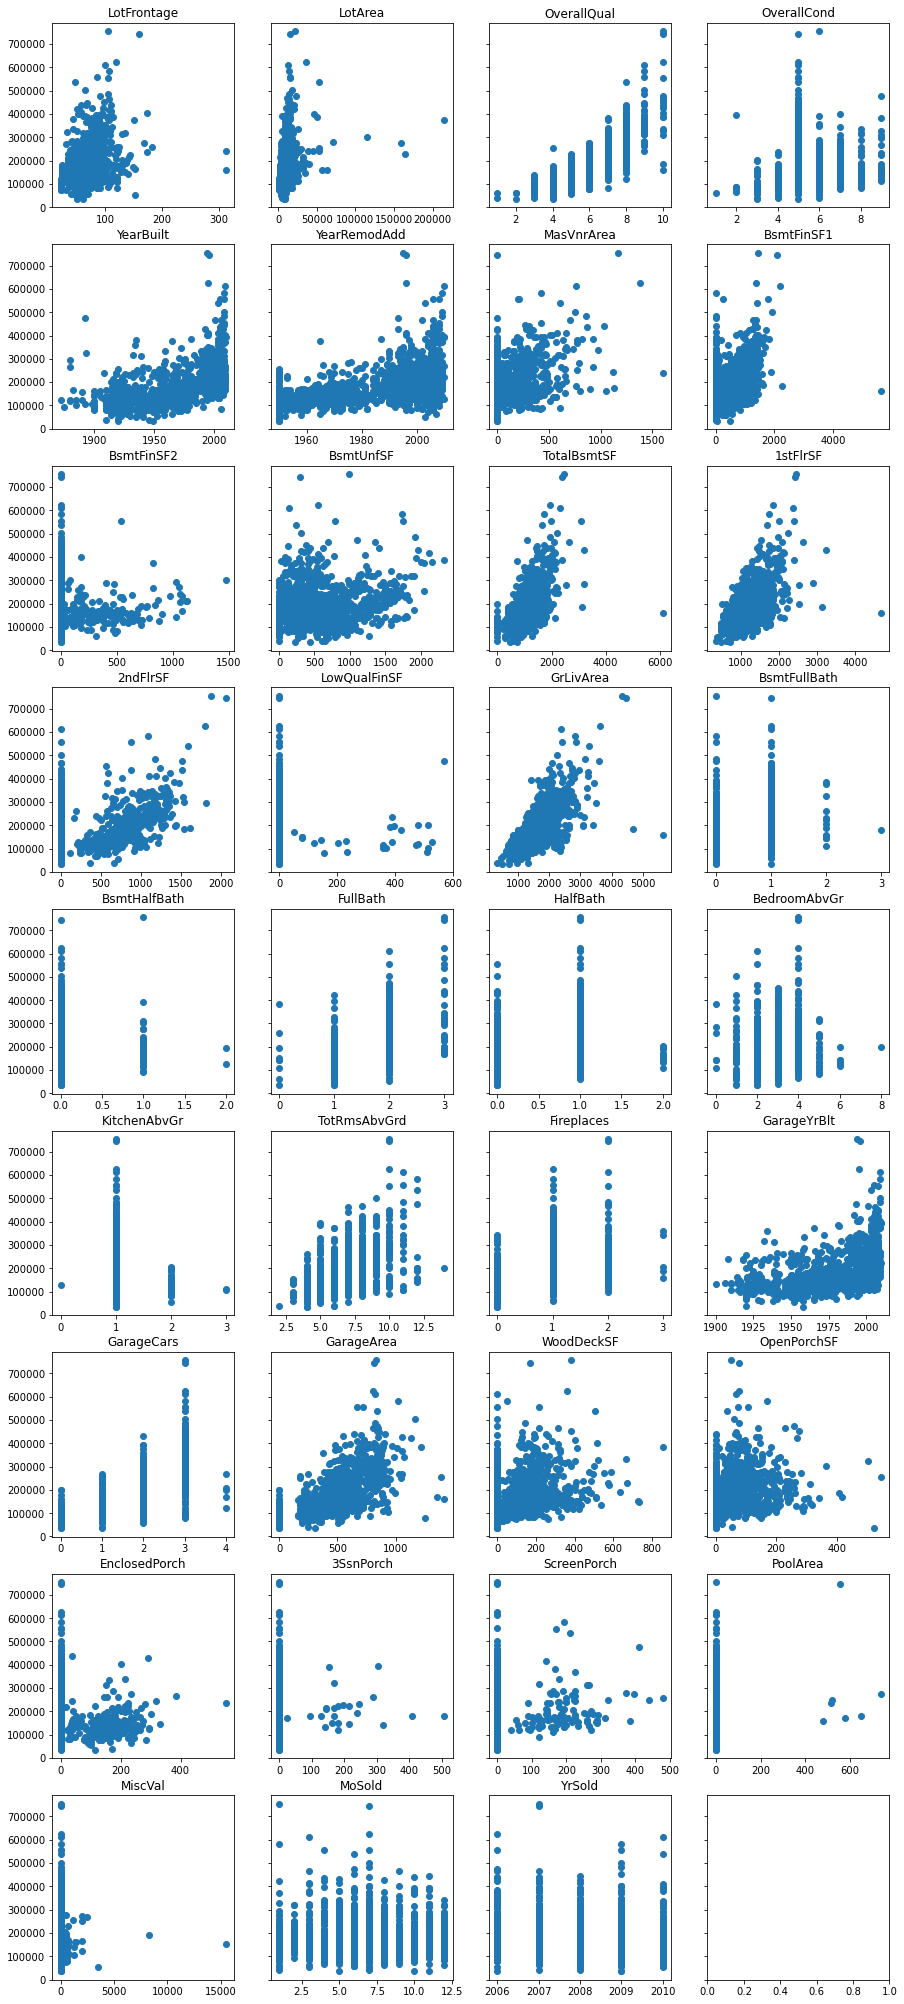

In [42]:
plot_feature_target_xy(X_numerical, targets)

#### Histograms for categorical features

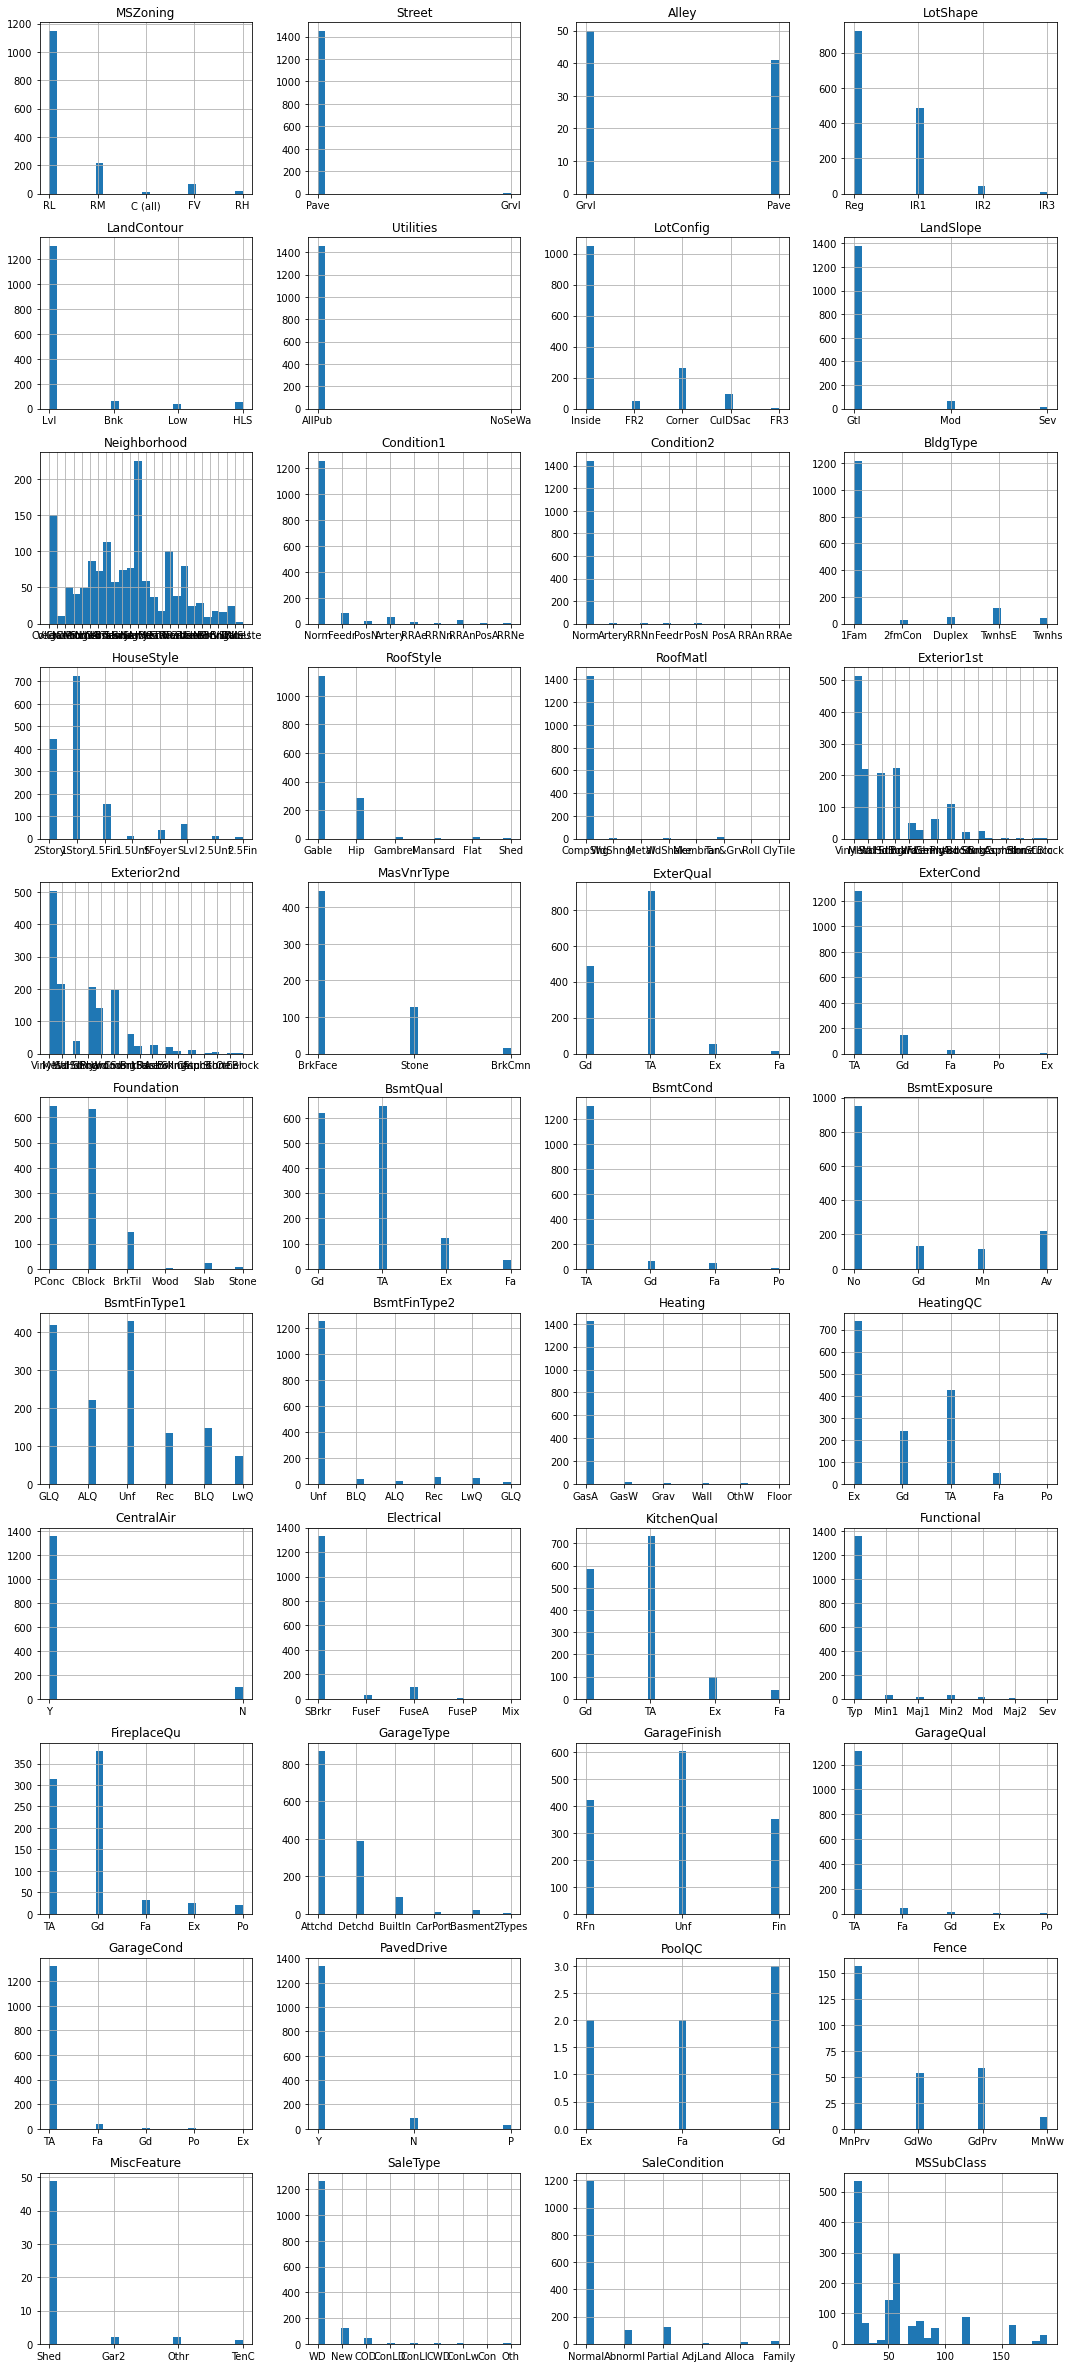

In [43]:
plot_pdfs(X_categorical)

#### Correlation matrix

In [44]:
feature_correlation = X_numerical.corr()
feature_correlation

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
LotFrontage,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,0.132644,...,0.344997,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450
LotArea,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,-0.002618,...,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261
OverallQual,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,0.308159,...,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347
OverallCond,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,-0.136841,...,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950
YearBuilt,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,0.149040,...,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618
YearRemodAdd,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,0.181133,...,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743
MasVnrArea,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,0.114442,...,0.373066,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201
BsmtFinSF1,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,-0.495251,...,0.296970,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359
BsmtFinSF2,0.049900,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,-0.209294,...,-0.018227,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706
BsmtUnfSF,0.132644,-0.002618,0.308159,-0.136841,0.149040,0.181133,0.114442,-0.495251,-0.209294,1.000000,...,0.183303,-0.005316,0.129005,-0.002538,0.020764,-0.012579,-0.035092,-0.023837,0.034888,-0.041258


In [45]:
target_correlation = pd.DataFrame(data=X_numerical.corrwith(Y_train['SalePrice']), columns=['SalePrice'])
target_correlation

,SalePrice
LotFrontage,0.341264
LotArea,0.304131
OverallQual,0.784220
OverallCond,-0.057378
YearBuilt,0.501494
YearRemodAdd,0.487208
MasVnrArea,0.491856
BsmtFinSF1,0.392630
BsmtFinSF2,0.003535
BsmtUnfSF,0.183705


In [46]:
correlated_pairs = set()
columns = list(feature_correlation.columns)
for i,col in enumerate(columns):
    for j in range(i+1, len(columns)):
        c = feature_correlation.iloc[i,j]
        if abs(c) > 0.7:
            pair = (columns[i], columns[j])
            correlated_pairs.add(pair)
correlated_pairs

{('GarageCars', 'GarageArea'),
 ('GrLivArea', 'TotRmsAbvGrd'),
 ('TotalBsmtSF', '1stFlrSF'),
 ('YearBuilt', 'GarageYrBlt')}

#### Selection of features most correlated with the target

In [47]:
threshold = 0.3
threshold_cond = target_correlation.iloc[:,0] > threshold
selected_num_features = list(target_correlation[threshold_cond].index)
selected_num_features

['LotFrontage',
 'LotArea',
 'OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF']

#### drop dependent features

In [48]:
for to_remove in ['GarageCars','TotRmsAbvGrd','1stFlrSF','GarageYrBlt']:
    selected_num_features.remove(to_remove)
print(selected_num_features)

['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF', '2ndFlrSF', 'GrLivArea', 'FullBath', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF']


## Features selection

In [128]:
one_hot_features = [
'MSZoning',
# 'LotShape',
# 'LandContour',
# 'LotConfig',
# 'LandSlope',
# 'Neighborhood',
# 'BldgType',
# 'HouseStyle',
# 'RoofStyle',
# 'Exterior1st',
# 'Exterior2nd',
# 'Foundation',
# 'CentralAir',
# 'Electrical',
# 'GarageType',
# 'GarageFinish',
# 'SaleType',
# 'SaleCondition'
]

ordinal_features = [
'ExterQual',
'ExterCond',
# 'HeatingQC',
# 'KitchenQual'
]

missing_values_features = ['Electrical','GarageType','GarageFinish']

ordinal_categories = ['Ex', 'Gd', 'TA', 'Fa', 'Po']

In [129]:
selected_features = selected_num_features + ordinal_features + one_hot_features
new_selected_features = [a for a in selected_features if a not in ignore_na_features]
selected_features = new_selected_features
print(selected_features)
print('selected features:', len(selected_features))

['LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF', '2ndFlrSF', 'GrLivArea', 'FullBath', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'ExterQual', 'ExterCond', 'MSZoning']
selected features: 17


## Preprocess data

In [130]:
print('one hot features', one_hot_features)
print('ordinal_features', ordinal_features)
print('all features', selected_features)

one hot features ['MSZoning']
ordinal_features ['ExterQual', 'ExterCond']
all features ['LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF', '2ndFlrSF', 'GrLivArea', 'FullBath', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'ExterQual', 'ExterCond', 'MSZoning']


In [151]:
nominal_transformer = make_pipeline(
    SimpleImputer(strategy='constant', fill_value='NA'),
    OneHotEncoder(sparse_output=False)
)

ordinal_transformer = make_pipeline(OrdinalEncoder(), StandardScaler())

standard_transformer = make_pipeline(
    SimpleImputer(strategy='mean'),
    StandardScaler()
)

preprocessor = make_pipeline(
    ColumnTransformer(transformers=[
        ('nominal', nominal_transformer, one_hot_features),
        ('ordinal', ordinal_transformer, ordinal_features)
    ], remainder = standard_transformer)
)

In [152]:
inputs_selected = inputs[selected_features]
inputs.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [153]:
scaled_inputs = preprocessor.fit_transform(inputs_selected)

In [154]:
np.sum(np.isnan(scaled_inputs))

0

In [155]:
print(scaled_inputs.shape)
pd_scaled = pd.DataFrame(data=scaled_inputs, columns=preprocessor.get_feature_names_out())
pd_scaled.head()

(1460, 21)


,nominal__MSZoning_C (all),nominal__MSZoning_FV,nominal__MSZoning_RH,nominal__MSZoning_RL,nominal__MSZoning_RM,ordinal__ExterQual,ordinal__ExterCond,remainder__LotArea,remainder__OverallQual,remainder__YearBuilt,...,remainder__MasVnrArea,remainder__BsmtFinSF1,remainder__TotalBsmtSF,remainder__2ndFlrSF,remainder__GrLivArea,remainder__FullBath,remainder__Fireplaces,remainder__GarageArea,remainder__WoodDeckSF,remainder__OpenPorchSF
0,0.0,0.0,0.0,1.0,0.0,-0.777976,0.364207,-0.207142,0.651479,1.050994,...,0.511418,0.575425,-0.459303,1.161852,0.370333,0.789741,-0.951226,0.351000,-0.752176,0.216503
1,0.0,0.0,0.0,1.0,0.0,0.663451,0.364207,-0.091886,-0.071836,0.156734,...,-0.574410,1.171992,0.466465,-0.795163,-0.482512,0.789741,0.600495,-0.060731,1.626195,-0.704483
2,0.0,0.0,0.0,1.0,0.0,-0.777976,0.364207,0.073480,0.651479,0.984752,...,0.323060,0.092907,-0.313369,1.189351,0.515013,0.789741,0.600495,0.631726,-0.752176,-0.070361
3,0.0,0.0,0.0,1.0,0.0,0.663451,0.364207,-0.096897,0.651479,-1.863632,...,-0.574410,-0.499274,-0.687324,0.937276,0.383659,-1.026041,0.600495,0.790804,-0.752176,-0.176048
4,0.0,0.0,0.0,1.0,0.0,-0.777976,0.364207,0.375148,1.374795,0.951632,...,1.364570,0.463568,0.199680,1.617877,1.299326,0.789741,0.600495,1.698485,0.780197,0.563760


In [156]:
nan_counts = pd_scaled.isna().sum()
print(nan_counts)

nominal__MSZoning_C (all)    0
nominal__MSZoning_FV         0
nominal__MSZoning_RH         0
nominal__MSZoning_RL         0
nominal__MSZoning_RM         0
ordinal__ExterQual           0
ordinal__ExterCond           0
remainder__LotArea           0
remainder__OverallQual       0
remainder__YearBuilt         0
remainder__YearRemodAdd      0
remainder__MasVnrArea        0
remainder__BsmtFinSF1        0
remainder__TotalBsmtSF       0
remainder__2ndFlrSF          0
remainder__GrLivArea         0
remainder__FullBath          0
remainder__Fireplaces        0
remainder__GarageArea        0
remainder__WoodDeckSF        0
remainder__OpenPorchSF       0
dtype: int64


## Data split

In [157]:
X_train, X_test, Y_train, Y_test = train_test_split(scaled_inputs, targets, test_size=0.3, shuffle=True)
X_validation, X_test, Y_validation, Y_test = train_test_split(X_test, Y_test, test_size=0.5)
print(f'Original data size: {inputs.shape}')
print(f'Train X: {X_train.shape} Y: {Y_train.shape}')
print(f'Validation X: {X_validation.shape}, Y: {Y_validation.shape}')
print(f'Test X:{X_test.shape} Y: {Y_test.shape}')

Original data size: (1460, 79)
Train X: (1022, 21) Y: (1022, 1)
Validation X: (219, 21), Y: (219, 1)
Test X:(219, 21) Y: (219, 1)


## Build pipeline

In [158]:
# nominal_transformer = make_pipeline(
#     SimpleImputer(strategy='constant', fill_value='NA'),
#     OneHotEncoder(sparse_output=False)
# )

# ordinal_transformer = make_pipeline(OrdinalEncoder(), StandardScaler())

# standard_transformer = make_pipeline(
#     SimpleImputer(strategy='mean'),
#     StandardScaler()
# )

# preprocessor = ColumnTransformer(transformers=[
#     ('nominal', nominal_transformer, one_hot_features),
#     ('ordinal', ordinal_transformer, ordinal_features)
# ], remainder = standard_transformer)

regressor = LinearRegression()

model = make_pipeline(
#     preprocessor, 
    regressor
)
model

Pipeline(steps=[('linearregression', LinearRegression())])

In [159]:
model.fit(X_train, Y_train)

Pipeline(steps=[('linearregression', LinearRegression())])

In [160]:
model.score(X_train, Y_train)

0.8113064925219349

## F-statistic and p-values

In [162]:
preprocessed_columns = preprocessor.get_feature_names_out()

In [166]:
from sklearn.feature_selection import f_regression
f_stat, p_values = f_regression(X_train,Y_train.to_numpy().reshape(1,-1)[0])
print(f_stat)
print(p_values)

[  10.89629774    7.80167488    2.7819161    58.31829191   87.99123018
  699.10547458   20.43000993   79.44618799 1725.66914481  414.53560614
  382.31751772  304.4782266   206.3677699   623.02077401  106.86445134
 1046.10091113  491.74893957  270.45596922  610.5773206   130.50134789
   95.62979652]
[9.96961179e-004 5.31745000e-003 9.56409863e-002 5.11678662e-014
 4.12430771e-020 9.42098519e-118 6.90923117e-006 2.23948580e-018
 1.49153001e-221 1.34702931e-077 1.48957558e-072 7.22093548e-060
 9.37483243e-043 1.03643147e-107 6.86465362e-024 1.59851545e-158
 3.10441081e-089 4.38862977e-054 5.03618579e-106 1.58693701e-028
 1.19511813e-021]


In [167]:
from pprint import pprint
df_fstat = pd.DataFrame(data=[f_stat],columns=preprocessed_columns).transpose()
pd.set_option('display.max_rows', 200)
df_fstat

,0
nominal__MSZoning_C (all),10.896298
nominal__MSZoning_FV,7.801675
nominal__MSZoning_RH,2.781916
nominal__MSZoning_RL,58.318292
nominal__MSZoning_RM,87.991230
ordinal__ExterQual,699.105475
ordinal__ExterCond,20.430010
remainder__LotArea,79.446188
remainder__OverallQual,1725.669145
remainder__YearBuilt,414.535606


In [168]:
df_pvalues = pd.DataFrame(data=[p_values], columns=preprocessed_columns).transpose()
df_pvalues

,0
nominal__MSZoning_C (all),9.969612e-04
nominal__MSZoning_FV,5.317450e-03
nominal__MSZoning_RH,9.564099e-02
nominal__MSZoning_RL,5.116787e-14
nominal__MSZoning_RM,4.124308e-20
ordinal__ExterQual,9.420985e-118
ordinal__ExterCond,6.909231e-06
remainder__LotArea,2.239486e-18
remainder__OverallQual,1.491530e-221
remainder__YearBuilt,1.347029e-77


## Model evaluation

#### Train data - model score (R^2)

In [169]:
model.score(X_train, Y_train)

0.8113064925219349

#### Train data RMSE

In [178]:
from sklearn.metrics import root_mean_squared_error
Y_predict = regressor.predict(X_train)
rmse = root_mean_squared_error(Y_train, Y_predict)
rmse

35165.07786060473

#### Validation - model score

In [172]:
# X_validation_scaled = preprocessor.transform(X_validation)
regressor.score(X_validation, Y_validation)

0.8498588418264565

In [173]:
Y_validation_predict = regressor.predict(X_validation)
rmse = root_mean_squared_error(Y_validation, Y_validation_predict)
rmse

29740.270674947627

#### Test data RMSE

In [174]:
Y_test_predict = regressor.predict(X_test)
rmse_test = root_mean_squared_error(Y_test, Y_test_predict)
rmse_test

38947.422054694005

#### Test data predictions

In [175]:
df_results = pd.DataFrame(data=np.column_stack((Y_test,Y_test_predict)), columns=['Y_test','Y_predict'])
df_results.head(n=10)

,Y_test,Y_predict
0,173000.0,178808.246877
1,135000.0,118069.033302
2,89500.0,102999.934052
3,129500.0,100788.424501
4,178400.0,246831.498717
5,157000.0,162072.449521
6,125500.0,93117.763058
7,235000.0,267736.899195
8,139400.0,135453.556015
9,150750.0,141831.358558
